# Project: Investigate the medical appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The medical appointment dataset contains information on over 110k appointments from the country of Brazil. It was originally sourced from Kaggle. It was created to study What factors are important to predict if a patient will show up for their scheduled appointment.
The dataset contains basic demographic information on the patients and if the patient received SMS notifications or not.

> #### Content
> The dataset contains 110,527 medical appointments associated with 14 variables (characteristics).

>#### Data Dictionary
> <ol><li>PatientId: Identification of a patient.</li><li>AppointmentID: Identification of each appointment.</li><li>Gender: Male (M) or Female (F). Female is the greater proportion, woman takes way more care of they health in    comparison to man.</li><li>ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.</li><li>AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.</li><li>Age: How old is the patient.</li><li>Neighbourhood: indicates thelocation of the hospital.</li><li>Scholarship: True or False, Indicates whether or not the patient is enrolled in Brasilian welfare program.</li><li>Hipertension: True or False.</li><li>Diabetes: True or False.</li><li>Alcoholism: True or False.</li><li>Handcap: True or False.</li><li>SMS_received: 1 or more messages sent to the patient.</li><li>No-show: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li></ol>


>#### Questions
   <ol><li>Are there specific days of the week when the attendance for the appointment is less than others?</li><li>Does age indicate whether the patient will attend appointments?</li><li>Do SMS notifications affect the number of attending (increase or decrease)</li></ol>

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load the data 
df=pd.read_csv('Kaggle-May-2016.csv')

In [3]:
# print first 10 rows to explore the data
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
# display entries and columns
df.shape

(110527, 14)

**There is 110,527 appointments and 14 columns**

In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
#chicking datatypes, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



> There are no missing values, but some of the datatypes should be vixed such as scheduleday and appointmentday

In [7]:
#summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> I have noticed there are invalid values in the age column, which are minus values (min).

In [8]:
# Check for duplicates
df.duplicated().sum()

0

> No duplicate rows

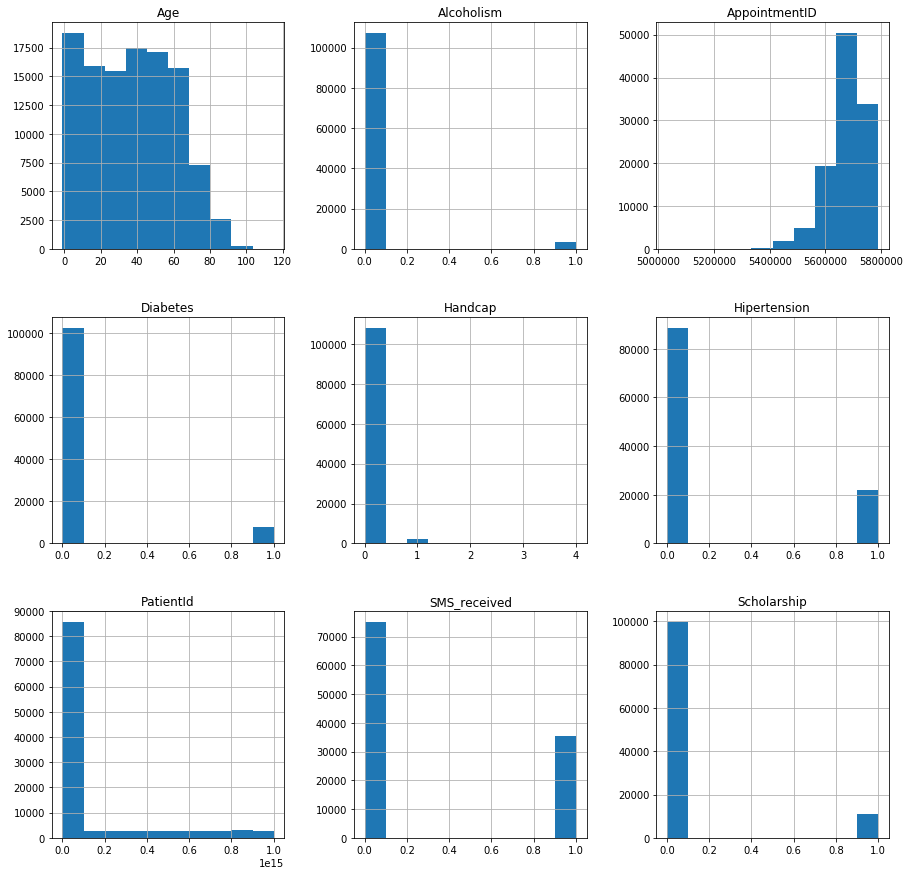

In [9]:
# plotting - initial look
df.hist(figsize=(15,15));



 > After exploring the dataset, I have noticed the following:

    1- Dates (scheduel, appointment) are in string datatypes, This should be fixed to analyse if some certain days related to No-show scenario.
    2- Some ages are in zero and minus values, by that, I considered zero age values as less than a year (months).
    3- Most SMS notifications are sent one time or less, and this needs to be analyzed to find the relationship between the sent SMS and the attendance of the appointment. 




### Data Cleaning 

In [10]:
# Converting strings to datetime datatype and keep the date only
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: x.date()) 

In [11]:
# Converting strings to datetime datatype 
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [12]:
# use day_name function to pull the days from panda
df['DayofWeek'] = pd.DatetimeIndex(df['AppointmentDay']).day_name()

In [13]:
#count the number of appointments for each Day.
df.DayofWeek.value_counts().to_frame(name='Number of Appointments')

,Number of Appointments
Wednesday,25867
Tuesday,25640
Monday,22715
Friday,19019
Thursday,17247
Saturday,39


In [14]:
#Drop all rows with minus value in Age column
minus_age= df.query('Age<0').index
df.drop(minus_age, inplace = True)

In [15]:
# Rename column name to NoShow
df.rename(columns={'No-show':'NoShow'}, inplace=True)

In [16]:
# I've dropped the following columns since I'm not using them and it would ease my exploration during my analysis
df.drop(['PatientId','AppointmentID','Neighbourhood','Alcoholism','Diabetes','Handcap'],axis=1, inplace = True) 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Does age indicate whether the patient will attend appointments?)

In [17]:
# Pationts who showed up for their scheduled appointment
show_up= df['NoShow'] == 'No'

In [18]:
# Pationts who didn't show up
noshow_up= df['NoShow'] == 'Yes'

Text(0,0.5,'Number of patients')

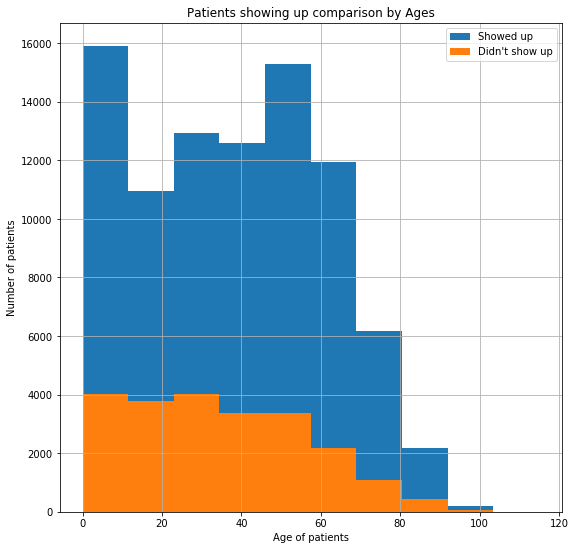

In [19]:
# Visualize number of showed/didn't show up patients based on age
plt.figure(figsize=(9,9))
plt.hist(df.Age[show_up], label = 'Show up', alpha=1)
plt.hist(df.Age[noshow_up], label = 'Didn\'t show up', alpha=1)
plt.title('Patients showing up comparison by Ages')
plt.grid(b = True, axis = 'both') # Enable grid lines for better visualization
plt.legend(['Showed up', 'Didn\'t show up']) # Displaying legends
plt.xlabel('Age of patients')
plt.ylabel('Number of patients')

As the above figure illustrates, the majority number of patients who didn't show up compared to the number of their scheduled appointments are of the age (0-10).

### Research Question 2  (Do SMS notifications affect the number of attending (increase or decrease))

In [20]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

Text(0,0.5,'Number of Patients')

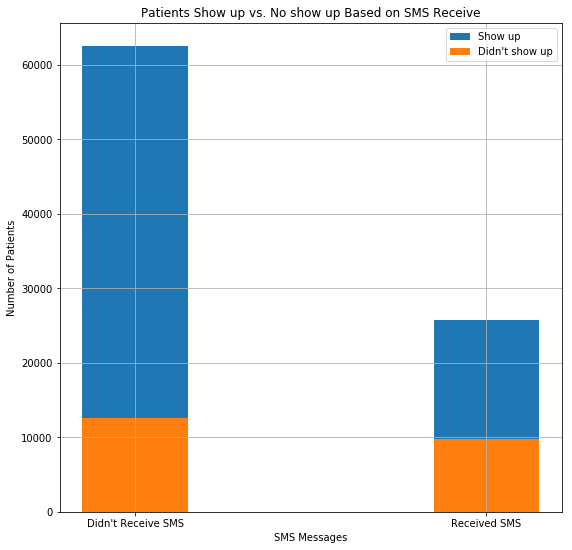

In [21]:
# Visualize number of showed/didn't show up patients based on SMS message receive
plt.figure(figsize=(9,9)) 
plt.bar(np.arange(2), df.SMS_received[show_up].value_counts(), 0.3, label='Show up', alpha=1)
plt.bar(np.arange(2), df.SMS_received[noshow_up].value_counts(), 0.3, label='Didn\'t show up', alpha=1)
plt.title('Patients Show up vs. No show up Based on SMS Receive');
plt.grid(b=True)
plt.legend()
plt.xticks(np.arange(2), ('Didn\'t Receive SMS','Received SMS'))
plt.xlabel('SMS Messages')
plt.ylabel('Number of Patients')

The above figure shows that the majority of patients who didn't receive SMS message managed to show up to their scheduled appointments.

### Research Question 3 (Are there specific days of the week when the attendance for the appointment is less than others?)

In [25]:
day_counts = df.groupby(['DayofWeek']).count()['NoShow']
day_counts

DayofWeek
Friday       19019
Monday       22714
Saturday        39
Thursday     17247
Tuesday      25640
Wednesday    25867
Name: NoShow, dtype: int64

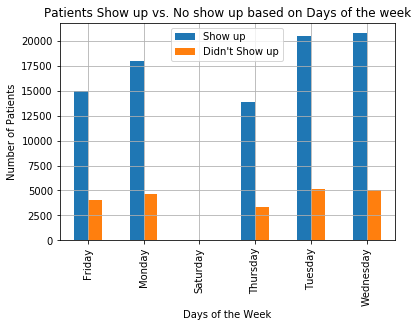

In [53]:
# Visualize number of showed/didn't show up patients based on Days of Week
df.groupby('DayofWeek').NoShow.value_counts().unstack(1).plot.bar()
plt.title('Patients Show up vs. No show up based on Days of the week');
plt.grid(b=True)
labels = ['Show up', 'Didn\'t Show up']
plt.legend(labels)
plt.xlabel('Days of the Week')
plt.ylabel('Number of Patients');

We can see that Tuesday and Wednesday are the most two days which patients don't show up in.

<a id='conclusions'></a>
## Conclusions

#### Limitations
During my exploration, I faced many issues that are considered as limitations in this dataset. The first one was erroneous values and datatypes, where I found minus values in ages, and patient Ids were floats instead of integers. Those errors indicate that the data were not collected correctly or were collected with a specific purpose but we weren't provided with enough details about it. Moreover, this dataset is rich with data that we could have exploited it to figure out why patients don't show up to their scheduled appointments if some indicators were provided with enough description.

To conclude, after exploring over 110,000 medical records and study the relationship between the three independent variables age, SMS messages, and days of the week, I found that none of the previously mentioned variables have a strong effect on the dependant variable showup.

<a id='references'></a>
## References 
The following are the resources that I have used during this project:
<ul>
    <li><a href="https://www.kaggle.com/joniarroba/noshowappointments?select=KaggleV2-May-2016.csv">Dataset</a></li>
    <li><a href="https://stackoverflow.com/questions/48238305/bar-plot-with-groupby">Bar plot with groupby</a></li>
    <li><a href="https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot">How to put the legend out of the plot</a></li>
</ul>

In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0